In [1]:
import tensorflow as tf

In [2]:
m = 500
model_file = "./Model/model.ckpt"

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(model_file + str(m) + ".meta")
    saver.restore(sess, model_file + str(m))
    
#     gv = [v for v in tf.global_variables()]
#     for v in gv:
#         print(v.name)

#     W = tf.global_variables()[0]
#     print(W.name)
#     print(W.shape)
#     print(W)
    
    graph = tf.get_default_graph()
    W_var = graph.get_tensor_by_name('Wconv1:0')
    W = sess.run(W_var)

print(W.shape)   

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt500
(5, 5, 1, 64)


In [3]:
import numpy as np
[h, w, c_i, c_o] = W.shape

W_new = np.zeros([c_o, c_i, h, w])
for hh in range(h):
    for ww in range(w):
        for ii in range(c_i):
            for oo in range(c_o):
                W_new[oo][ii][hh][ww] = W[hh][ww][ii][oo]
print(W_new.shape)

(64, 1, 5, 5)


In [4]:
print(np.max(W_new))
print(np.min(W_new))

0.343920737505
-0.280505985022


In [5]:
import matplotlib.pyplot as plt

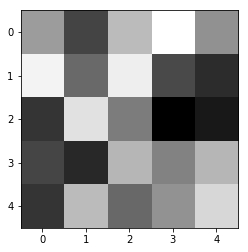

In [7]:
plt.imshow(W_new[0][0], cmap=plt.cm.gray)

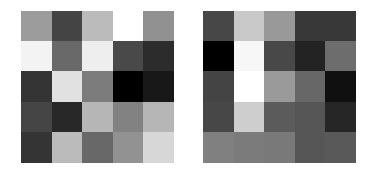

In [11]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(W_new[0][0], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(W_new[1][0], cmap=plt.cm.gray)
plt.axis('off')
plt.show()

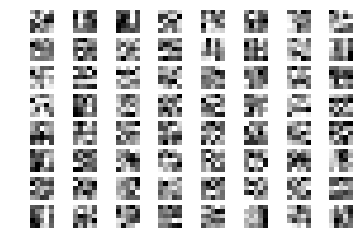

In [15]:
plt.figure()
row = 8
col = 8
index = 0
for r in range(row):
    for c in range(col):
        plt.subplot(row, col, index + 1)
        plt.imshow(W_new[index][0], cmap=plt.cm.gray)
        plt.axis('off')
        index = index + 1
plt.savefig('./lernels.png')
plt.show()